In [3]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, threshold=np.nan)
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [4]:
data = pd.read_csv('villes.csv', sep=';')
X = data.ix[:,1:13].values
labels = data.ix[:,0].values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
res = []
nb_component = 0
while sum(res) < .7:
    nb_component += 1
    pca = PCA(n_components=nb_component)
    pca.fit(X_scaled)
    pca.transform(X_scaled)
    res = pca.explained_variance_ratio_
print(nb_component)

1


In [5]:
pca2 = PCA(n_components=2)
pca2.fit(X_scaled)
X_pca = pca2.transform(X_scaled)

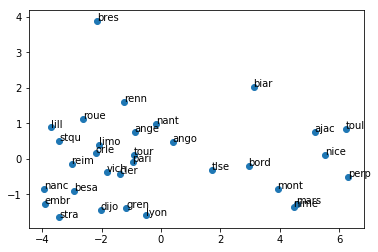

In [6]:
plt.scatter(X_pca[:,0], X_pca[:,1])
for label, x, y in zip(labels, X_pca[:,0], X_pca[:,1]):
    plt.annotate(label,xy=(x,y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [7]:
data2 = pd.read_csv('crime.csv', sep=';')
X2 = data2.ix[:,1:7].values
labels2 = data2.ix[:,0].values
scaler = StandardScaler()
scaler.fit(X2)
X2_scaled = scaler.transform(X2)
res = []
nb_component = 0
while sum(res) < .7:
    nb_component += 1
    pca = PCA(n_components=nb_component)
    pca.fit(X2_scaled)
    pca.transform(X2_scaled)
    res = pca.explained_variance_ratio_
print(nb_component)

2


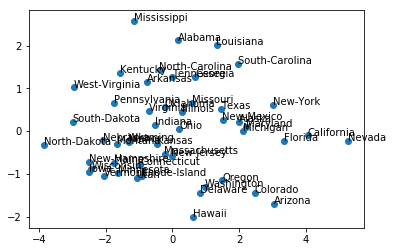

In [8]:
X2_pca = pca.transform(X2_scaled)
plt.scatter(X2_pca[:,0], X2_pca[:,1])
for label, x, y in zip(labels2, X2_pca[:,0], X2_pca[:,1]):
    plt.annotate(label,xy=(x,y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X2_pca)
clustering = kmeans.predict(X2_pca)

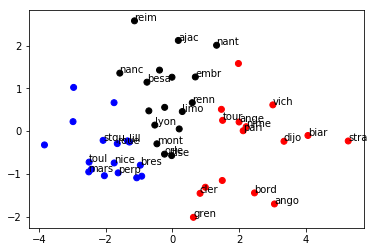

In [10]:
import matplotlib
colors = ['red', 'yellow', 'blue', 'black']
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=clustering,
            cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X2_pca[:,0], X2_pca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-.2,.2), textcoords='offset points')
plt.show()

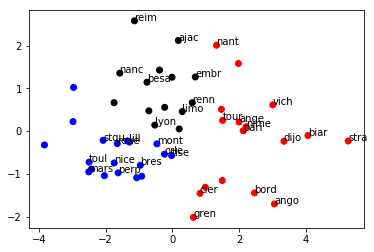

In [11]:
agglo = AgglomerativeClustering(linkage='ward', n_clusters=3)
c2 = agglo.fit_predict(X2_pca)
colors = ['red', 'yellow', 'blue', 'black']
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=c2,
            cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X2_pca[:,0], X2_pca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-.2,.2), textcoords='offset points')
plt.show()

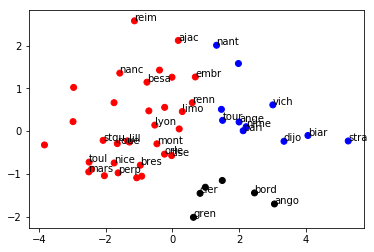

In [12]:
agglo = AgglomerativeClustering(linkage='average', n_clusters=3)
c2 = agglo.fit_predict(X2_pca)
colors = ['red', 'yellow', 'blue', 'black']
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=c2,
            cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X2_pca[:,0], X2_pca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-.2,.2), textcoords='offset points')
plt.show()

In [13]:
from sklearn import metrics
m = -np.Inf
res = -1
for i in np.arange(2,6):
    clust = KMeans(n_clusters=i).fit_predict(X2_pca)
    if metrics.silhouette_score(X2_pca, clust, metric='euclidean') > m:
        res = i
        m = metrics.silhouette_score(X2_pca, clust, metric='euclidean')
print(res)
   

2


In [14]:
def dunn(c, distances):
    """
    Dunn index for cluster validation (the bigger, the better)
    """
    unique_cluster_distances = np.unique(min_cluster_distances(c, distances))
    max_diameter = max(diameter(c, distances))

    if np.size(unique_cluster_distances) > 1:
        return unique_cluster_distances[1] / max_diameter
    else:
        return unique_cluster_distances[0] / max_diameter

def min_cluster_distances(c, distances):
    """Calculates the distances between the two nearest points of each cluster"""
    min_distances = np.zeros((max(c) + 1, max(c) + 1))
    for i in np.arange(0, len(c)):
        if c[i] == -1: continue
        for ii in np.arange(i + 1, len(c)):
            if c[ii] == -1: continue
            if c[i] != c[ii] and distances[i, ii] > min_distances[c[i], c[ii]]:
                min_distances[c[i], c[ii]] = min_distances[c[ii], c[i]] = distances[i, ii]
    return min_distances

def diameter(c, distances):
    """Calculates cluster diameters (the distance between the two farthest data points in a cluster)"""
    diameters = np.zeros(max(c) + 1)
    for i in np.arange(0, len(c)):
        if c[i] == -1: continue
        for ii in np.arange(i + 1, len(c)):
            if c[ii] == -1: continue
            if c[i] != -1 or c[ii] != -1 and c[i] == c[ii] and distances[i, ii] > diameters[c[i]]:
                diameters[c[i]] = distances[i, ii]
    return diameters 

In [15]:
from sklearn.metrics import euclidean_distances
m = -np.Inf
res = -1
for i in np.arange(2,6):
    clust = KMeans(n_clusters=i).fit_predict(X2_pca)
    if dunn(clust, euclidean_distances(X2_pca, X2_pca)) > m:
        res = i
        m = dunn(clust, euclidean_distances(X2_pca, X2_pca))
print(res)


2


In [16]:
def get_value(s):
    if s == '+':
        return 1
    return 0

credit = pd.read_csv('credit.data', delimiter='\t', header=None, decimal='.')
credit.dropna(thresh=0, inplace=True)
credit[15] = credit[15].map(get_value)
credit_num = credit.ix[:,(1, 2, 7, 10, 13, 14, 15)]
for col in credit_num.columns:
    credit_num[col] = pd.to_numeric(credit_num[col], errors='coerce')

credit_num.dropna(inplace=True)
credit_label = credit_num.loc[:,15]
credit_X_num = credit_num.loc[:,(1, 2, 7, 10, 13, 14)]
credit_X_num[10] = credit_X_num[10].astype('float64')
credit_X_num[14] = credit_X_num[14].astype('float64')

In [17]:
sum(credit_X_num[1].isna())

0

Descriptions des données par colonne

In [18]:
credit_X_num.describe()

,1,2,7,10,13,14
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,31.569054,4.798078,2.222320,2.459459,182.115616,998.584084
std,11.920174,5.005309,3.347599,4.929794,171.477919,5202.975198
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.602500,1.010000,0.165000,0.000000,75.250000,0.000000
50%,28.500000,2.750000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.207500,2.585000,3.000000,271.000000,399.000000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000


Répartition des + et - dans la base d'apprentissage

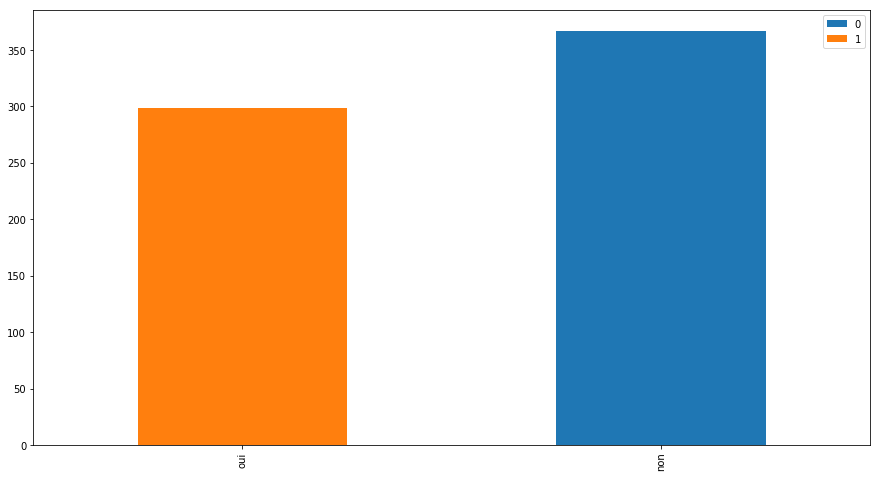

In [19]:
oui = credit_label[credit_label == 1].value_counts()
non = credit_label[credit_label == 0].value_counts()
df = pd.DataFrame([oui, non])
df.index = ['oui','non']
df.plot(kind='bar', stacked=True, figsize=(15,8))

In [20]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

In [21]:
def run_classifiers(clfs, X, y, standardisation=True, engineering=True, replace=False, min_acp=.7):
    if not standardisation and engineering:
        raise AttributeError('you have to scale if you want to add pca variables')
    if standardisation:
        n = max(X.columns)
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        
    if engineering:
        res = list()
        nb_component = 0
        while sum(res)<min_acp:
            nb_component += 1
            pca = PCA(n_components=nb_component)
            pca.fit_transform(X)
            res = pca.explained_variance_ratio_
        pca = PCA(n_components=nb_component)
        if replace:
            X = pca.fit_transform(X)
        else:
            ajout = pca.fit_transform(X)
            X = np.concatenate((X, ajout), axis=1)
    kf = KFold(n_splits=10, shuffle=True, random_state=20)
    r = list()
    for name, clf in clfs.items():
        
        cv_acc = cross_validate(clf, X, y, cv=kf, scoring=('accuracy', 'roc_auc', 'recall', 'precision'))
       # lul
        r.append([name,
                  str(np.round(np.mean(cv_acc['test_accuracy']),4)) + ' +/- ' + str(np.round(np.std(cv_acc['test_accuracy']),4)),
                  str(np.round(np.mean(cv_acc['test_roc_auc']),4)) + ' +/- ' + str(np.round(np.std(cv_acc['test_roc_auc']),4)),
                  str(np.round(np.mean(cv_acc['test_recall']),4)) + ' +/- ' + str(np.round(np.std(cv_acc['test_recall']),4)),
                  str(np.round(np.mean(cv_acc['test_precision']),4)) + ' +/- ' + str(np.round(np.std(cv_acc['test_precision']),4)),
                  str(np.round(np.mean(cv_acc['fit_time']),4)) + 's'])
    res = pd.DataFrame(r)
    res.columns = ['Name', 'Accuracy', 'AUC','Recall','Precision', 'Time']
    return res

In [31]:
clfs={
'Tree': DecisionTreeClassifier(random_state=20),
'RF': RandomForestClassifier(n_estimators=50, random_state=20),
'Bagg': BaggingClassifier(n_estimators=50, random_state=20),
'KNN': KNeighborsClassifier(n_neighbors=1),
'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=20),
'SVM': SVC(),
'XGBOOST': XGBClassifier(
 n_estimators=50,
 seed=20),
"MLPC": MLPClassifier(hidden_layer_sizes=(20, 10))
}


In [32]:
run_classifiers(clfs, credit_X_num, credit_label, standardisation=False, engineering=False)

,Name,Accuracy,AUC,Recall,Precision,Time
0,Tree,0.6923 +/- 0.0474,0.6921 +/- 0.0493,0.6552 +/- 0.0911,0.6612 +/- 0.0612,0.0031s
1,RF,0.7839 +/- 0.061,0.85 +/- 0.0588,0.7214 +/- 0.1066,0.792 +/- 0.1082,0.0741s
2,Bagg,0.7733 +/- 0.0607,0.8476 +/- 0.053,0.695 +/- 0.1175,0.7917 +/- 0.1162,0.0963s
3,KNN,0.6563 +/- 0.0547,0.6501 +/- 0.0608,0.5659 +/- 0.1179,0.6289 +/- 0.0937,0.001s
4,AdaBoost,0.7763 +/- 0.0491,0.8532 +/- 0.0431,0.7191 +/- 0.1143,0.7796 +/- 0.0949,0.0698s
5,SVM,0.5464 +/- 0.0458,0.6702 +/- 0.0599,0.0308 +/- 0.0245,0.365 +/- 0.2984,0.0139s
6,XGBOOST,0.7913 +/- 0.047,0.8637 +/- 0.0453,0.7088 +/- 0.1019,0.8136 +/- 0.0837,0.0168s
7,MLPC,0.6335 +/- 0.0651,0.6607 +/- 0.0711,0.5375 +/- 0.1604,0.6105 +/- 0.0834,0.0249s


On voit que le SVM ne fonctionne pas très bien (probleme de données non normalisées)
On voit aussi que les methodes ensemblistes semblent bien fonctionner sans avoir encore cherché les "meilleurs" hyperparamètres

In [30]:
run_classifiers(clfs, credit_X_num, credit_label, standardisation=True,engineering=False)

,Name,Accuracy,AUC,Recall,Precision,Time
0,Tree,0.6908 +/- 0.048,0.6905 +/- 0.0497,0.6552 +/- 0.0911,0.6582 +/- 0.057,0.0024s
1,RF,0.7839 +/- 0.061,0.8496 +/- 0.058,0.7214 +/- 0.1066,0.792 +/- 0.1082,0.0726s
2,Bagg,0.7749 +/- 0.0597,0.8479 +/- 0.0525,0.698 +/- 0.1152,0.7923 +/- 0.1165,0.0961s
3,KNN,0.7163 +/- 0.0298,0.7172 +/- 0.0314,0.6696 +/- 0.1089,0.7027 +/- 0.0777,0.0006s
4,AdaBoost,0.7763 +/- 0.0491,0.8532 +/- 0.0431,0.7191 +/- 0.1143,0.7796 +/- 0.0949,0.0685s
5,SVM,0.7688 +/- 0.0633,0.8444 +/- 0.0489,0.6118 +/- 0.1108,0.844 +/- 0.0967,0.01s
6,XGBOOST,0.7928 +/- 0.0468,0.8638 +/- 0.0454,0.7088 +/- 0.1019,0.817 +/- 0.0812,0.0152s
7,MLPC,0.7883 +/- 0.054,0.8548 +/- 0.0365,0.6933 +/- 0.1086,0.8123 +/- 0.0745,0.291s


On voit qu'après normalisation, MLPC, SVM et KNN performent bien mieux que sans alors que pour les méthodes ensemblistes et l'arbre cela n'a rien changé de manière significative

In [26]:
run_classifiers(clfs, credit_X_num, credit_label, standardisation=True,engineering=True, replace=True)

,Name,Accuracy,AUC,Recall,Precision,Time
0,Tree,0.6653 +/- 0.0626,0.669 +/- 0.0658,0.644 +/- 0.1329,0.6306 +/- 0.085,0.0031s
1,RF,0.7209 +/- 0.0574,0.7973 +/- 0.053,0.6516 +/- 0.1205,0.7164 +/- 0.0858,0.0805s
2,Bagg,0.718 +/- 0.0593,0.7893 +/- 0.0431,0.6334 +/- 0.1073,0.7169 +/- 0.1001,0.0955s
3,KNN,0.7073 +/- 0.0554,0.7097 +/- 0.0546,0.6579 +/- 0.1069,0.6966 +/- 0.1097,0.0005s
4,AdaBoost,0.727 +/- 0.0612,0.7844 +/- 0.0538,0.6576 +/- 0.078,0.7169 +/- 0.1008,0.071s
5,SVM,0.7417 +/- 0.0672,0.7967 +/- 0.0585,0.561 +/- 0.1187,0.8174 +/- 0.0936,0.0101s
6,XGBOOST,0.7358 +/- 0.0452,0.8004 +/- 0.0445,0.6476 +/- 0.0745,0.7433 +/- 0.0868,0.0099s
7,MLPC,0.7553 +/- 0.0623,0.8205 +/- 0.0578,0.6337 +/- 0.0924,0.7907 +/- 0.0971,0.2811s


In [27]:
run_classifiers(clfs, credit_X_num, credit_label, standardisation=True,engineering=True, replace=False)

,Name,Accuracy,AUC,Recall,Precision,Time
0,Tree,0.7223 +/- 0.0389,0.7249 +/- 0.0401,0.7042 +/- 0.0952,0.6939 +/- 0.0795,0.0052s
1,RF,0.7779 +/- 0.0493,0.8489 +/- 0.0496,0.7121 +/- 0.0998,0.7904 +/- 0.1,0.084s
2,Bagg,0.7689 +/- 0.0477,0.8516 +/- 0.0507,0.7037 +/- 0.1167,0.7802 +/- 0.1005,0.1415s
3,KNN,0.7148 +/- 0.0393,0.7161 +/- 0.0408,0.6644 +/- 0.1167,0.7035 +/- 0.082,0.0006s
4,AdaBoost,0.7853 +/- 0.0357,0.8465 +/- 0.0477,0.7261 +/- 0.0808,0.7873 +/- 0.0778,0.0803s
5,SVM,0.7688 +/- 0.0587,0.8389 +/- 0.0475,0.607 +/- 0.0874,0.8475 +/- 0.1049,0.0109s
6,XGBOOST,0.7884 +/- 0.0517,0.8617 +/- 0.0539,0.6941 +/- 0.1164,0.8152 +/- 0.0769,0.0143s
7,MLPC,0.8078 +/- 0.0561,0.8517 +/- 0.0406,0.713 +/- 0.1054,0.8375 +/- 0.0628,0.2947s


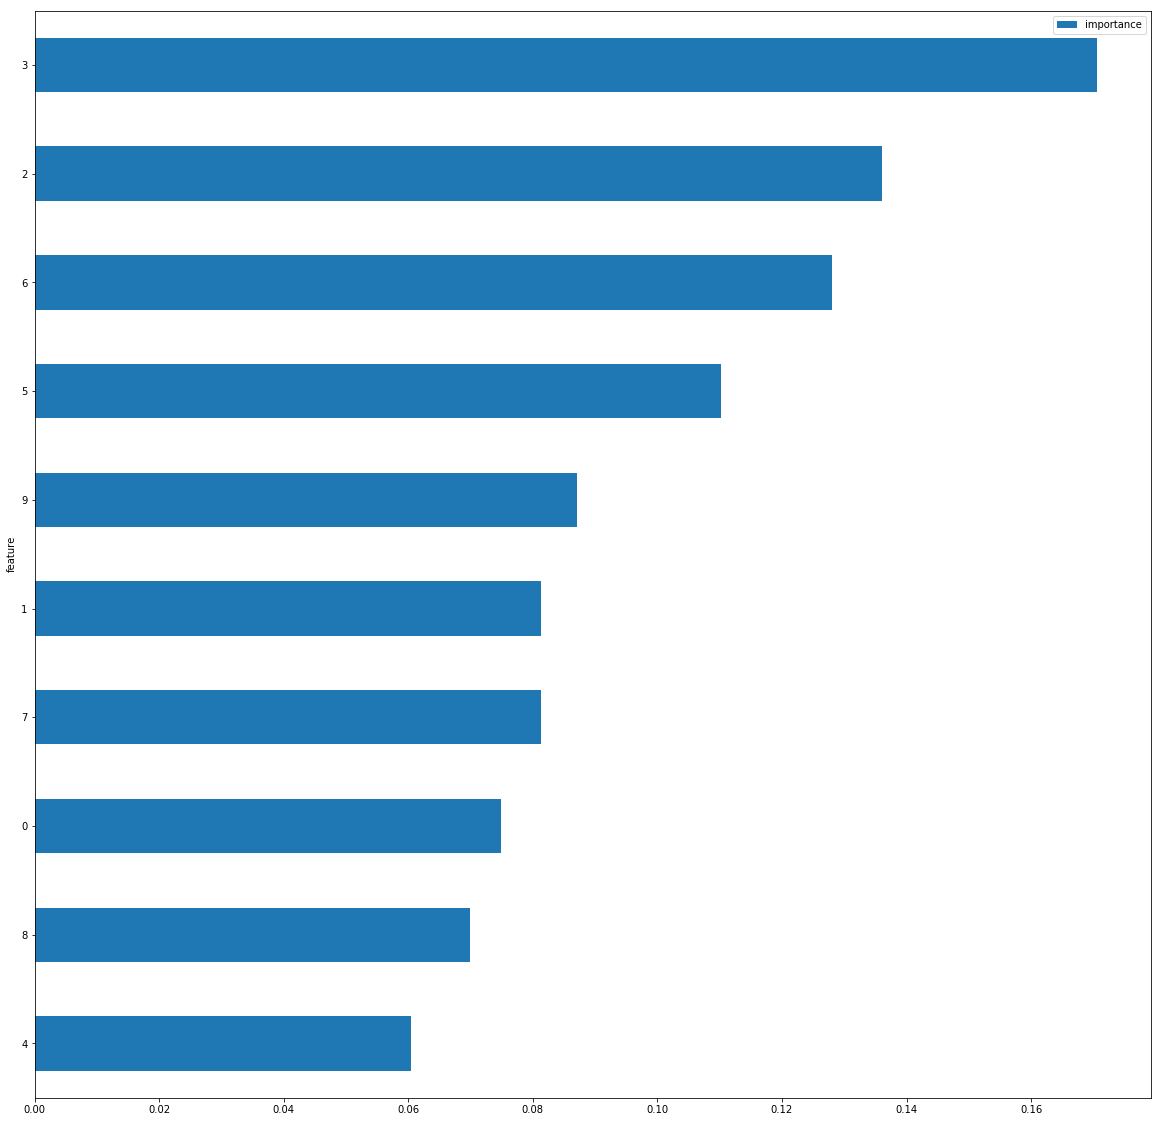

In [28]:
res = list()
nb_component = 0
X = scaler.fit_transform(credit_X_num)
while sum(res)<.7:
    nb_component += 1
    pca = PCA(n_components=nb_component)
    pca.fit_transform(X)
    res = pca.explained_variance_ratio_
pca = PCA(n_components=nb_component)
ajout = pca.fit_transform(X)
X = np.concatenate((X, ajout), axis=1)


df = pd.DataFrame(X)

clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X, credit_label)
features = pd.DataFrame()
features['feature'] = df.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))